# Question 14.1

The breast cancer data set breast-cancer-wisconsin.data.txt from http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/  (description at http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29 ) has missing values.
1.	Use the mean/mode imputation method to impute values for the missing data.
2.	Use regression to impute values for the missing data.
3.	Use regression with perturbation to impute values for the missing data.
4.	(Optional) Compare the results and quality of classification models (e.g., SVM, KNN) build using 
(1) the data sets from questions 1,2,3; 
(2) the data that remains after data points with missing values are removed; and 
(3) the data set when a binary variable is introduced to indicate missing values.


In [ ]:
Approach Followed

In [4]:
#Clear environment

rm(list = ls())
# Setting the random number generator seed so that our results are reproducible
set.seed(1)

In [117]:
##########LIBRARY##########
library("ggplot2")
#install.packages("devtools")
#install.packages("corrplot")
library("devtools")
library("corrplot") # to use Correlation plot
library(tidyr) # to get "gather" function
library(plyr) #to use arrange function
library(DAAG)# for cross validation

Loading required package: lattice


Attaching package: 'DAAG'


The following object is masked from 'package:plyr':

    ozone




In [29]:
data = read.table("breast-cancer-wisconsin.data.txt",header=FALSE,stringsAsFactors = FALSE,sep=",") %>% as_tibble()
head(data)
#summary(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


In [45]:
# categorical tabulation of data with the variable and its frequency to find missing data is.
for (i in 2:11) {
  print(paste0("--------Field",i,'--------'))
  print(as.table(table(data[i])))
}



[1] "--------Field2--------"

  1   2   3   4   5   6   7   8   9  10 
145  50 108  80 130  34  23  46  14  69 
[1] "--------Field3--------"

  1   2   3   4   5   6   7   8   9  10 
384  45  52  40  30  27  19  29   6  67 
[1] "--------Field4--------"

  1   2   3   4   5   6   7   8   9  10 
353  59  56  44  34  30  30  28   7  58 
[1] "--------Field5--------"

  1   2   3   4   5   6   7   8   9  10 
407  58  58  33  23  22  13  25   5  55 
[1] "--------Field6--------"

  1   2   3   4   5   6   7   8   9  10 
 47 386  72  48  39  41  12  21   2  31 
[1] "--------Field7--------"

  ?   1  10   2   3   4   5   6   7   8   9 
 16 402 132  30  28  19  30   4   8  21   9 
[1] "--------Field8--------"

  1   2   3   4   5   6   7   8   9  10 
152 166 165  40  34  10  73  28  11  20 
[1] "--------Field9--------"

  1   2   3   4   5   6   7   8   9  10 
443  36  44  18  19  22  16  24  16  61 
[1] "--------Field10--------"

  1   2   3   4   5   6   7   8  10 
579  35  33  12   6   3   9 

In [46]:
#From above, Field 7 has "?" which denotes missing value
#Total:16 missing values 

#table1 = as.table(table(data$X5,data$X2.1))
table1 = as.table(table(data[7]))
table1


  ?   1  10   2   3   4   5   6   7   8   9 
 16 402 132  30  28  19  30   4   8  21   9 

In [47]:
# show the missing 16 data points
data[which(data$V7 == "?"),]

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2


In [51]:
# Find the percentage of observations with missing data.
print(paste0('Total rows:',nrow(data))) ##669
nrow(data[which(data$V7 == "?"),])/nrow(data) #16/669=0.023%

[1] "Total rows:699"


[1] 0.02288984

In [66]:
#Since it is less than 5%, it complies with the Imputation rule to proceed with the imputation
#Get the row# of missing entries
print(paste0("Row ID:",which(data$V7 == "?", arr.ind = TRUE)))
NeedImpute <-which(data$V7 == "?", arr.ind = TRUE)

 [1] "Row ID:24"  "Row ID:41"  "Row ID:140" "Row ID:146" "Row ID:159"
 [6] "Row ID:165" "Row ID:236" "Row ID:250" "Row ID:276" "Row ID:293"
[11] "Row ID:295" "Row ID:298" "Row ID:316" "Row ID:322" "Row ID:412"
[16] "Row ID:618"


# Question 14.1.1
1.	Use the mean/mode imputation method to impute values for the missing data.

In [ ]:
# I had a dilemma whether to treat Field 7 as the quantitative or categorical variable
#Though it had numbers, there are just 10 distinct values for this field (1 through 10)
#making it look more like categorical field
#So, I am using mode 

In [93]:
mode_1 <- mode(data[-NeedImpute,"V7"]) #mode return lists

In [94]:
distinct <-unique(data[-NeedImpute,"V7"]) #find unique values
distinct

V7
<chr>
1
10
2
4
3
9
7
5
8


In [104]:
mode_V7=which.max(tabulate(match(mode_1, distinct))) #find mode
mode_V7
#On manual check, 1 is present 400+ times out of 600+ records.
#so we have the correct mode

[1] 1

In [102]:
#######IMPUTE MODE of 1 #########
#Create a copy variable and Impute V7 with mode for V7

data_mode_imp <- data

In [108]:
data_mode_imp[NeedImpute,]$V7 <- as.character(mode_V7)

In [109]:
data_mode_imp$V7 <- as.integer(data_mode_imp$V7)

In [111]:
#######VALIDATION#########
#Check Imputed table
print(as.table(table(data_mode_imp[7])))


  1   2   3   4   5   6   7   8   9  10 
418  30  28  19  30   4   8  21   9 132 


In [ ]:
#From results above, No "?" found

# END of Question 14.1.1#####

# Question 14.1.2
2.	Use regression to impute values for the missing data.

In [113]:
# Do not include the response variable in regression imputation

data_modified <- data[-NeedImpute,2:10] # exclude field7 with "?" values
data_modified$V7 <- as.integer(data_modified$V7)


In [114]:
# Generate linear model using all other factors as predictors

model <- lm(V7~V2+V3+V4+V5+V6+V8+V9+V10, data = data_modified)
summary(model)


Call:
lm(formula = V7 ~ V2 + V3 + V4 + V5 + V6 + V8 + V9 + V10, data = data_modified)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7316 -0.9426 -0.3002  0.6725  8.6998 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.616652   0.194975  -3.163  0.00163 ** 
V2           0.230156   0.041691   5.521 4.83e-08 ***
V3          -0.067980   0.076170  -0.892  0.37246    
V4           0.340442   0.073420   4.637 4.25e-06 ***
V5           0.339705   0.045919   7.398 4.13e-13 ***
V6           0.090392   0.062541   1.445  0.14883    
V8           0.320577   0.059047   5.429 7.91e-08 ***
V9           0.007293   0.044486   0.164  0.86983    
V10         -0.075230   0.059331  -1.268  0.20524    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.274 on 674 degrees of freedom
Multiple R-squared:  0.615,	Adjusted R-squared:  0.6104 
F-statistic: 134.6 on 8 and 674 DF,  p-value: < 2.2e-16


In [115]:
#Variable selection using Step regression
step(model)

Start:  AIC=1131.43
V7 ~ V2 + V3 + V4 + V5 + V6 + V8 + V9 + V10

       Df Sum of Sq    RSS    AIC
- V9    1     0.139 3486.8 1129.5
- V3    1     4.120 3490.8 1130.2
- V10   1     8.317 3495.0 1131.0
<none>              3486.6 1131.4
- V6    1    10.806 3497.5 1131.5
- V4    1   111.227 3597.9 1150.9
- V8    1   152.482 3639.1 1158.7
- V2    1   157.657 3644.3 1159.6
- V5    1   283.119 3769.8 1182.8

Step:  AIC=1129.45
V7 ~ V2 + V3 + V4 + V5 + V6 + V8 + V10

       Df Sum of Sq    RSS    AIC
- V3    1     4.028 3490.8 1128.2
- V10   1     8.179 3495.0 1129.0
<none>              3486.8 1129.5
- V6    1    11.211 3498.0 1129.7
- V4    1   114.768 3601.6 1149.6
- V2    1   158.696 3645.5 1157.8
- V8    1   160.776 3647.6 1158.2
- V5    1   285.902 3772.7 1181.3

Step:  AIC=1128.24
V7 ~ V2 + V4 + V5 + V6 + V8 + V10

       Df Sum of Sq    RSS    AIC
- V6    1     8.606 3499.4 1127.9
- V10   1     8.889 3499.7 1128.0
<none>              3490.8 1128.2
- V4    1   153.078 3643.9 1155.6
- V2


Call:
lm(formula = V7 ~ V2 + V4 + V5 + V8, data = data_modified)

Coefficients:
(Intercept)           V2           V4           V5           V8  
    -0.5360       0.2262       0.3173       0.3323       0.3238  


In [116]:
#V2+V4+V5+V8  combination has lowest number of variables with better AIC 1127.01
model2 <- lm(V7~V2+V4+V5+V8, data = data_modified)
summary(model2)
#R2 => 0.6107 (same R2 as all variables)


Call:
lm(formula = V7 ~ V2 + V4 + V5 + V8, data = data_modified)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8115 -0.9531 -0.3111  0.6678  8.6889 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.53601    0.17514  -3.060   0.0023 ** 
V2           0.22617    0.04121   5.488 5.75e-08 ***
V4           0.31729    0.05086   6.239 7.76e-10 ***
V5           0.33227    0.04431   7.499 2.03e-13 ***
V8           0.32378    0.05606   5.775 1.17e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.274 on 678 degrees of freedom
Multiple R-squared:  0.6129,	Adjusted R-squared:  0.6107 
F-statistic: 268.4 on 4 and 678 DF,  p-value: < 2.2e-16


Analysis of Variance Table

Response: V7
           Df Sum Sq Mean Sq F value  Pr(>F)    
V2          1   3185    3185   616.2 < 2e-16 ***
V4          1   1683    1683   325.5 < 2e-16 ***
V5          1    510     510    98.6 < 2e-16 ***
V8          1    172     172    33.4 1.2e-08 ***
Residuals 678   3505       5                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




Warning message in cv.lm(data_modified, model2, m = 5):
"

 As there is >1 explanatory variable, cross-validation
 predicted values for a fold are not a linear function
 of corresponding overall predicted values.  Lines that
 are shown for the different folds are approximate
"



fold 1 
Observations in test set: 136 
              [,1]    [,2]   [,3]  [,4]  [,5]   [,6]   [,7]  [,8]  [,9] [,10]
Predicted    4.663 10.0184  1.213  6.62 6.575  1.213  1.213 10.15  5.02 7.572
cvpred       4.619 10.0582  1.255  6.52 6.465  1.255  1.255 10.07  4.82 7.447
V7           4.000 10.0000  1.000 10.00 7.000  1.000  1.000  1.00  3.00 8.000
CV residual -0.619 -0.0582 -0.255  3.48 0.535 -0.255 -0.255 -9.07 -1.82 0.553
             [,11] [,12] [,13] [,14]  [,15] [,16]  [,17] [,18]  [,19] [,20]
Predicted    5.598 5.750  3.50  3.39  1.990   7.7  1.213  3.15  1.998  4.67
cvpred       5.369 5.638  3.53  3.32  1.982   7.5  1.255  3.35  1.954  4.75
V7           5.000 6.000 10.00  2.00  1.000  10.0  1.000  1.00  1.000  8.00
CV residual -0.369 0.362  6.47 -1.32 -0.982   2.5 -0.255 -2.35 -0.954  3.25
             [,21]  [,22] [,23]   [,24] [,25] [,26]  [,27] [,28] [,29] [,30]
Predicted    1.990  1.311  4.82  0.9873  7.54  7.18  7.415  6.59  4.51 0.663
cvpred       1.982  1.425  4.79  1.0

ERROR: Error in which.min(xval): 'list' object cannot be coerced to type 'double'


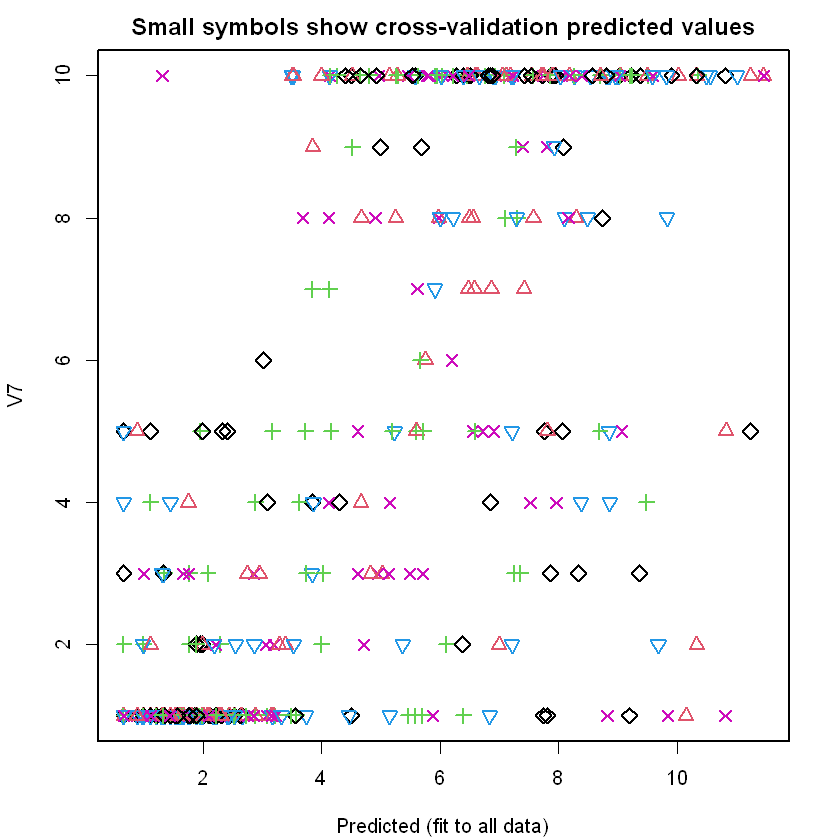

In [122]:
# Use cross-validation to test how good this model really is.
model_cv <- cv.lm(data_modified, model2, m=5)
SST <- sum((as.numeric(data[-NeedImpute,]$V7) - mean(as.numeric(data[-NeedImpute,]$V7)))^2)
R2_cv <- 1 - attr(model_cv,"ms")*nrow(data[-NeedImpute,])/SST
R2_cv
#P values for all predictors are low

In [ ]:
#P values for all predictors are low
#SSE : 675

In [123]:
# Get predictions for missing V7 values.
V7_hat <- predict(model2, newdata = data[NeedImpute,])

In [126]:
#Create new variable and impute regression results
# Impute V7 for observations with missing data for V7 to predicted
# values with this linear model.

data_reg_imp <- data

In [128]:
data_reg_imp[NeedImpute,]$V7 <- as.character(V7_hat)

In [130]:
data_reg_imp$V7 <- as.numeric(data_reg_imp$V7)

In [132]:
# Round the V7_hat values since the originals are all integer

data_reg_imp[NeedImpute,]$V7 <- round(V7_hat)
data_reg_imp$V7 <- as.integer(data_reg_imp$V7)

[1]  1 10  2  4  1 10 10  1  1  1  1  1  3  3  9  1  1  1 10  1 10  7  1  5  1
 [26]  7  1  1  1  1  1  1  5  1  1  1  1  1 10  7  8  3 10  1  1  1  9  1  1  8
 [51]  3  4  5  8  8  5  6  1 10  2  3  2  8  2  1  2  1 10  9  1  1  2  1 10  4
 [76]  2  1  1  3  1  1  1  1  2  9  4  8 10  1  1  1  1  1  1  1  1  1  1  6 10
[101]  5  5  1  3  1  3 10 10  1  9  2  9 10  8  3  5  2 10  3  2  1  2 10 10  7
[126]  1 10  1 10  1  1  1 10  1  1  2  1  1  1  1  1  1  5  5  1  2  8  2  1 10
[151]  1 10  5  3  1 10  1  1  1 10 10  1  1  3  2  2 10  1  1  1  1  1  1 10 10
[176] 10  1  1  1 10  1  1  1 10 10  1  8 10  8  1  8 10  1  1  1  1  7  1  1  1
[201] 10 10  1  1  1 10  5  1  1  1 10  8  1 10 10  5  1  1  4  1  1 10  5  8 10
[226]  1 10  5  1 10  7  8  1 10  1  3 10  2  9 10  2  1  1  5  1  2 10  9  1  2
[251]  1 10 10 10  8 10  1  1  1  8 10 10 10 10  3  1 10 10  4  1 10  1 10  4  1
[276]  2  1  1  1  7  1  1 10 10 10 10 10  1  5 10  1  1  6 10  1 10  5  3  1 10
[301]  4  1 10  1 10 10  1  1  3  5  1  1  1  1  1  5 10  8  1  5 10  2  1 10  1
[326]  1 10  1  4 10  8  1  1 10 10  1 10  1  1 10 10  1  1  1 10  1  1  1  1  8
[351]  1  1  3 10  1  1  3 10  4  7 10 10  3  3  1  1 10 10  1  1  1  1  1  1  1
[376]  1  1  1  1  1  1 10  1  1  1  1 10  1  1  2  1 10  1  1  1  1  1  1  1  1
[401]  9  1  1  4  1  1  1  1  2  1  1  1  4  1 10  3 10  1  2  1  3 10  1  1  1
[426] 10  1  2  1  1  1  1  1  1  8 10  1  1  1  1 10  4  3  2  1  1  1  1  1 10
[451]  1  1  1 10  1  6 10  3  1  1  1  5  1  1  1  4 10 10  1  1  1  1  1  1  1
[476]  1  1  1  1 10  1  1  5 10  1  3  1 10  3  4  1 10  1 10  5  1  1  1  1  1
[501]  1  1  1  1  1  1  5  4  1  1  1  1  1  1 10 10  1  1  1 10  1  1  5 10  1
[526]  1  1  1  1  1 10  1  1  1  1  1  1  1  1  1  2  1  1  1  1  1 10  1  1  5
[551]  1  1  1  5  1  1  1  1  1  1  1  1  1  1  1 10  1  3 10  5 10 10  1  1  2
[576]  1  1  1  1  1  1 10 10  1  1  1 10  1  3  1  1 10 10  1 10  1  1  1  1  1
[601]  1  1  1  1 10  8  1  1 10  1 10  2 10  1  1  1  1  1  1  1  1  2  1  1  1
[626]  4  6  5  1  1  1  1  1  3  1  1  1  2  1  1  1  1  1  1  1  1  1  1  2  1
[651]  4  1  1  1  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1  5  8  1  1  1  1
[676]  1  1  1  1  1 10 10  1  1  1  1  1  1  1  1  1  5  1  1  2  1  3  4  5

In [133]:
# Make sure no V7 values are outside of the orignal range.

data_reg_imp$V7[data_reg_imp$V7 > 10] <- 10
data_reg_imp$V7[data_reg_imp$V7 < 1] <- 1

In [134]:
#######VALIDATION#########
#Check Imputed table using Regression
print(as.table(table(data_reg_imp$V7)))


  1   2   3   4   5   6   7   8   9  10 
407  35  30  19  32   5   8  22   9 132 


In [ ]:
#At this point, V7 is treated categorical and the earlier assumption of mode seems logical
######END OF 14.1.2 REGRESSION###

# Question 14.1.3
3.	Use regression with perturbation to impute values for the missing data.

In [135]:
V7_hat_pert <- rnorm(nrow(data[NeedImpute,]), V7_hat, sd(V7_hat))
V7_hat_pert

[1]  6.9356  3.1438  0.0858 -0.7897  0.9571  3.3180  0.7916 -0.5771  6.7989
[10]  7.7664  2.7858  2.9856  6.4849  3.8058 -0.7303 -1.5784

In [142]:
# Notice that we get some negative values when we perturb the predicted values.

data_reg_pert_imp <- data
data_reg_pert_imp[NeedImpute,]$V7 <- as.character(V7_hat_pert)
data_reg_pert_imp$V7 <- as.numeric(data_reg_pert_imp$V7)
#data_reg_pert_imp$V7

[1]  1.0000 10.0000  2.0000  4.0000  1.0000 10.0000 10.0000  1.0000  1.0000
 [10]  1.0000  1.0000  1.0000  3.0000  3.0000  9.0000  1.0000  1.0000  1.0000
 [19] 10.0000  1.0000 10.0000  7.0000  1.0000  6.9356  1.0000  7.0000  1.0000
 [28]  1.0000  1.0000  1.0000  1.0000  1.0000  5.0000  1.0000  1.0000  1.0000
 [37]  1.0000  1.0000 10.0000  7.0000  3.1438  3.0000 10.0000  1.0000  1.0000
 [46]  1.0000  9.0000  1.0000  1.0000  8.0000  3.0000  4.0000  5.0000  8.0000
 [55]  8.0000  5.0000  6.0000  1.0000 10.0000  2.0000  3.0000  2.0000  8.0000
 [64]  2.0000  1.0000  2.0000  1.0000 10.0000  9.0000  1.0000  1.0000  2.0000
 [73]  1.0000 10.0000  4.0000  2.0000  1.0000  1.0000  3.0000  1.0000  1.0000
 [82]  1.0000  1.0000  2.0000  9.0000  4.0000  8.0000 10.0000  1.0000  1.0000
 [91]  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  6.0000
[100] 10.0000  5.0000  5.0000  1.0000  3.0000  1.0000  3.0000 10.0000 10.0000
[109]  1.0000  9.0000  2.0000  9.0000 10.0000  8.0000  3.0000  5.0000  2.0000
[118] 10.0000  3.0000  2.0000  1.0000  2.0000 10.0000 10.0000  7.0000  1.0000
[127] 10.0000  1.0000 10.0000  1.0000  1.0000  1.0000 10.0000  1.0000  1.0000
[136]  2.0000  1.0000  1.0000  1.0000  0.0858  1.0000  1.0000  5.0000  5.0000
[145]  1.0000 -0.7897  8.0000  2.0000  1.0000 10.0000  1.0000 10.0000  5.0000
[154]  3.0000  1.0000 10.0000  1.0000  1.0000  0.9571 10.0000 10.0000  1.0000
[163]  1.0000  3.0000  3.3180  2.0000 10.0000  1.0000  1.0000  1.0000  1.0000
[172]  1.0000  1.0000 10.0000 10.0000 10.0000  1.0000  1.0000  1.0000 10.0000
[181]  1.0000  1.0000  1.0000 10.0000 10.0000  1.0000  8.0000 10.0000  8.0000
[190]  1.0000  8.0000 10.0000  1.0000  1.0000  1.0000  1.0000  7.0000  1.0000
[199]  1.0000  1.0000 10.0000 10.0000  1.0000  1.0000  1.0000 10.0000  5.0000
[208]  1.0000  1.0000  1.0000 10.0000  8.0000  1.0000 10.0000 10.0000  5.0000
[217]  1.0000  1.0000  4.0000  1.0000  1.0000 10.0000  5.0000  8.0000 10.0000
[226]  1.0000 10.0000  5.0000  1.0000 10.0000  7.0000  8.0000  1.0000 10.0000
[235]  1.0000  0.7916 10.0000  2.0000  9.0000 10.0000  2.0000  1.0000  1.0000
[244]  5.0000  1.0000  2.0000 10.0000  9.0000  1.0000 -0.5771  1.0000 10.0000
[253] 10.0000 10.0000  8.0000 10.0000  1.0000  1.0000  1.0000  8.0000 10.0000
[262] 10.0000 10.0000 10.0000  3.0000  1.0000 10.0000 10.0000  4.0000  1.0000
[271] 10.0000  1.0000 10.0000  4.0000  1.0000  6.7989  1.0000  1.0000  1.0000
[280]  7.0000  1.0000  1.0000 10.0000 10.0000 10.0000 10.0000 10.0000  1.0000
[289]  5.0000 10.0000  1.0000  1.0000  7.7664 10.0000  2.7858 10.0000  5.0000
[298]  2.9856  1.0000 10.0000  4.0000  1.0000 10.0000  1.0000 10.0000 10.0000
[307]  1.0000  1.0000  3.0000  5.0000  1.0000  1.0000  1.0000  1.0000  1.0000
[316]  6.4849 10.0000  8.0000  1.0000  5.0000 10.0000  3.8058  1.0000 10.0000
[325]  1.0000  1.0000 10.0000  1.0000  4.0000 10.0000  8.0000  1.0000  1.0000
[334] 10.0000 10.0000  1.0000 10.0000  1.0000  1.0000 10.0000 10.0000  1.0000
[343]  1.0000  1.0000 10.0000  1.0000  1.0000  1.0000  1.0000  8.0000  1.0000
[352]  1.0000  3.0000 10.0000  1.0000  1.0000  3.0000 10.0000  4.0000  7.0000
[361] 10.0000 10.0000  3.0000  3.0000  1.0000  1.0000 10.0000 10.0000  1.0000
[370]  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
[379]  1.0000  1.0000  1.0000 10.0000  1.0000  1.0000  1.0000  1.0000 10.0000
[388]  1.0000  1.0000  2.0000  1.0000 10.0000  1.0000  1.0000  1.0000  1.0000
[397]  1.0000  1.0000  1.0000  1.0000  9.0000  1.0000  1.0000  4.0000  1.0000
[406]  1.0000  1.0000  1.0000  2.0000  1.0000  1.0000 -0.7303  4.0000  1.0000
[415] 10.0000  3.0000 10.0000  1.0000  2.0000  1.0000  3.0000 10.0000  1.0000
[424]  1.0000  1.0000 10.0000  1.0000  2.0000  1.0000  1.0000  1.0000  1.0000
[433]  1.0000  1.0000  8.0000 10.0000  1.0000  1.0000  1.0000  1.0000 10.0000
[442]  4.0000  3.0000  2.0000  1.0000  1.0000  1.0000  1.0000  1.0000 10.0000
[451]  1.0000  1.0000  1.0000 10.0000  1.0000  6.0000 10.0000  3.0000  1.0000
[460]  1.0000  1.0000  5

In [143]:
# Round the V7_hat_pert values to integers.

data_reg_pert_imp[NeedImpute,]$V7 <- round(V7_hat_pert)
data_reg_pert_imp$V7 <- as.integer(data_reg_pert_imp$V7)

In [144]:
# Make sure no V7 values are outside of the orignal range.

data_reg_pert_imp$V7[data_reg_pert_imp$V7 > 10] <- 10
data_reg_pert_imp$V7[data_reg_pert_imp$V7 < 1] <- 1

In [145]:
#######VALIDATION#########
#Check Imputed table using Regression
print(as.table(table(data_reg_pert_imp$V7)))


  1   2   3   4   5   6   7   8   9  10 
409  30  32  20  30   5  10  22   9 132 


In [ ]:
######END OF 14.1.3 PERTURBATION###

# Question 15.1

Describe a situation or problem from your job, everyday life, current events, etc., for which optimization 
would be appropriate. What data would you need? 


# Optimization in healthcare: 
As the global healthcare industry is faced with the challenging situation of high demand,
best quality for a better price, Prescriptive analytics can be used to not only what will happen, 
but also why it will happen, providing recommendations regarding actions 
that will take advantage of the predictions.

One of the scenario to utilize Optimization includes
Best way to accommodate patient schedule taking into account of staffs availability, resource availability (facility, tests), patient’s recent illness/procedure to accommodate this to establish schedules.
Below model is setup for a single medical facility

Variables:
x(i) : Open slots for patient Adhoc calls on day “i”
y(i) : Open slots for previously scheduled appointment on day “i”
z(i) : Total slots available for day “i”
Constraint:
x(i)+y(i) <= z(i)
z(Mon) through z(fri) >0
z(sat)+z(Sun) =0

Objective:
Minimize z(i)-[x(i)+y(i)] to efficiently use slots in the medical facility
